In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.optimize import curve_fit
import random

In [172]:
#1a

GLT = pd.read_csv('GlobalLandTemperaturesByState (1).csv')
GLT1 = GLT.iloc[:, [0, 1, 3]]
GLT1['dt'] = pd.to_datetime(GLT1['dt'])
GLT2 = GLT1[GLT1['dt'] >= '2000-01-01']
GLT3 = GLT2[GLT2['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
GLT3

C:\Users\owenk\AppData\Local\Temp\ipykernel_15904\2651533733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GLT1['dt'] = pd.to_datetime(GLT1['dt'])


,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [132]:
#1b

GLTAVG1 = GLT3.groupby('dt')['AverageTemperature'].mean().reset_index()
GLTAVG1

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


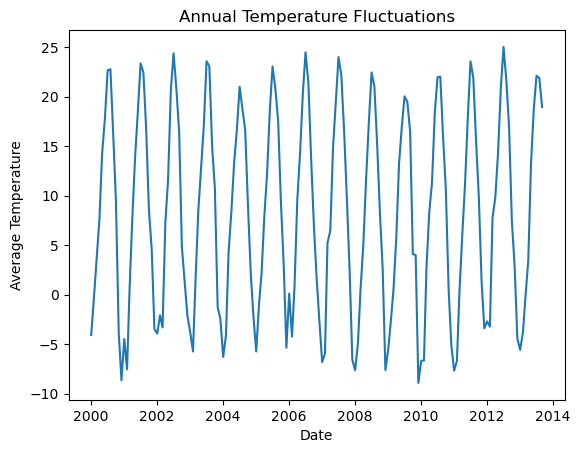

In [128]:
#1c

y = GLTAVG1['AverageTemperature']
x = GLTAVG1['dt']
plt.figure()
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Annual Temperature Fluctuations')
plt.show()

In [168]:
#1d

GLTAVG1['date'] = pd.to_datetime(GLTAVG1['dt'])
GLTAVG1['year'] = GLTAVG1['date'].dt.year
GLTAVG1['month'] = GLTAVG1['date'].dt.month
GLTAVG1['day'] = GLTAVG1['date'].dt.day
GLTAVG2 = GLTAVG1
GLTAVG2

,dt,AverageTemperature,date,year,month,day
0,2000-01-01,-4.072000,2000-01-01,2000,1,1
1,2000-02-01,-0.205000,2000-02-01,2000,2,1
2,2000-03-01,3.642667,2000-03-01,2000,3,1
3,2000-04-01,7.609667,2000-04-01,2000,4,1
4,2000-05-01,14.255000,2000-05-01,2000,5,1
...,...,...,...,...,...,...
160,2013-05-01,13.196000,2013-05-01,2013,5,1
161,2013-06-01,18.783667,2013-06-01,2013,6,1
162,2013-07-01,22.110333,2013-07-01,2013,7,1
163,2013-08-01,21.890000,2013-08-01,2013,8,1


In [216]:
#1e

def model(u, a, b, c, d):
    return a * u**2 + b * u + c + d * np.cos(2 * np.pi * u)

param_guesses = np.array([0, 0.1, 0, 1])
param_guesses

array([0. , 0.1, 0. , 1. ])

In [232]:
#1f

u = (GLTAVG2['year'] + (GLTAVG2['month'] - 1) / 12).values
y = GLTAVG2['AverageTemperature'].values
params_opt, params_cov = curve_fit(model, u, y, p0=param_guesses)
u_fit = np.linspace(u.min(), u.max(), 2500)
y_fit = model(u_fit, *params_opt)

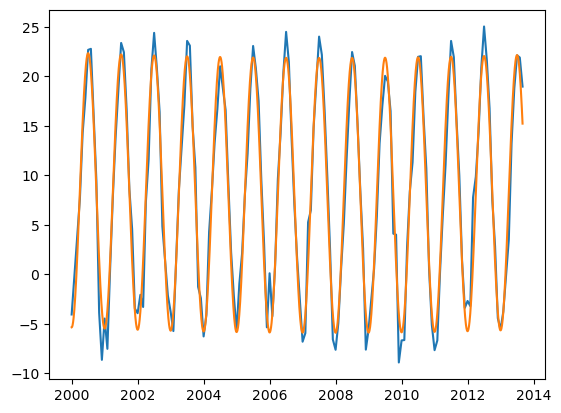

In [234]:
#1g

plt.figure()
plt.plot(u, y)
plt.plot(u_fit, y_fit)
plt.show()

In [260]:
#1h

param_errors = np.sqrt(np.diag(params_cov))

Parameter a: 0.009007385090369687 ± 0.011847496214705856
Parameter b: -36.17034354199068 ± 47.551879700521894
Parameter c: 36319.660220985585 ± 47714.177934790416
Parameter d: -13.88148741297054 ± 0.2354814408198577


In [274]:
#1i
for i, (param, error) in enumerate(zip(['a', 'b', 'c', 'd'], param_errors)):
  print(f"Parameter {param}: {params_opt[i]} ± {error}")
FinEq = (
    f"y = {params_opt[0]} * u^2 + {params_opt[1]} * u + "
    f"{params_opt[2]} + {params_opt[3]} * cos(2πu)"
)
print(FinEq)

Parameter a: 0.009007385090369687 ± 0.011847496214705856
Parameter b: -36.17034354199068 ± 47.551879700521894
Parameter c: 36319.660220985585 ± 47714.177934790416
Parameter d: -13.88148741297054 ± 0.2354814408198577
y = 0.009007385090369687 * u^2 + -36.17034354199068 * u + 36319.660220985585 + -13.88148741297054 * cos(2πu)


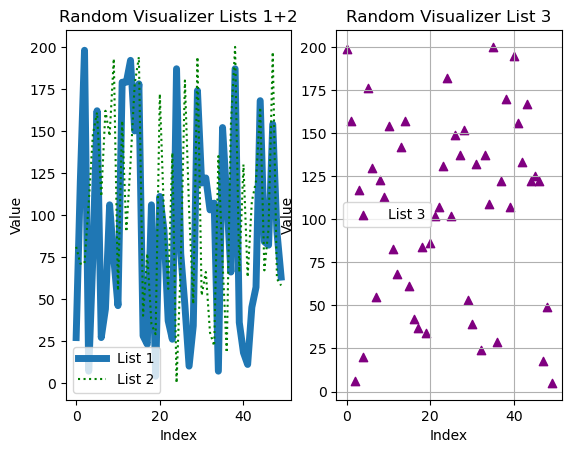

In [334]:
#2

list1 = [random.randint(0, 200) for a in range(50)]
list2 = [random.randint(0, 200) for a in range(50)]
list3 = [random.randint(0, 200) for a in range(50)]
#print(list1)
#print(list2)
#print(list3)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(list1, linewidth=5, label='List 1')
ax1.plot(list2, color='green', linestyle='dotted', label='List 2')
ax1.set_title("Random Visualizer Lists 1+2")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")
ax1.legend()

x = range(len(list3))
y = list3
ax2.scatter(range(len(list3)), list3, color='purple', marker='^', label='List 3')
ax2.set_title("Random Visualizer List 3")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")
ax2.legend()
ax2.grid(True)
plt.show()

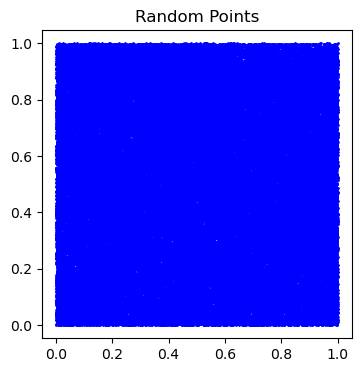

In [419]:
#3
N = 10**5
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
plt.figure(figsize = (4,4))
plt.scatter(x, y, color='blue', s=1)
plt.title("Random Points")
plt.axis('equal')
plt.show()

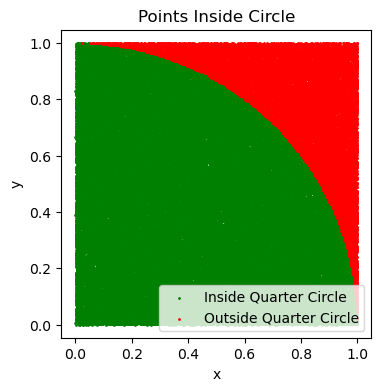

3.14876

In [421]:
Distance = np.sqrt(x**2 + y**2)
Radius = Distance <= 1
Interior = np.sum(Radius)
plt.figure(figsize = (4,4))
plt.scatter(x[Radius], y[Radius], color='green', s=1, label='Inside Quarter Circle')
plt.scatter(x[~Radius], y[~Radius], color='red', s=1, label='Outside Quarter Circle')
plt.title("Points Inside Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')
plt.show()
Pi = 4 * (Interior/N)
Pi